# Harmony and Symphony benchmarking

In [ ]:
# Installation of Python packages
!pip install rpy2==3.5.1 harmonypy scanpy[leiden]
!git clone https://github.com/potulabe/symphonypy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 28.2 MB/s 
     |████████████████████████████████| 2.0 MB 46.7 MB/s 
     |████████████████████████████████| 88 kB 9.1 MB/s 
     |████████████████████████████████| 96 kB 6.7 MB/s 
     |████████████████████████████████| 9.4 MB 48.5 MB/s 
     |████████████████████████████████| 1.3 MB 41.2 MB/s 
     |████████████████████████████████| 295 kB 53.7 MB/s 
     |████████████████████████████████| 965 kB 49.1 MB/s 
     |████████████████████████████████| 1.1 MB 45.1 MB/s 
     |████████████████████████████████| 3.3 MB 45.4 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
  Created wheel for rpy2: filename=rpy2-3.5.1-cp38-cp38-linux_x86_64.whl size=310196 sha256=66a44c94a3e7b671dae20c57660d9dc0adb2f219071810cf7b550bce143bc733
  Stored in directory: /root/.cache/pip/wheels/6b/40/7d/f63e87fd83e8b99ee837c8e3489081c4b3489134bc520235ed
  Cre

Cloning into 'symphonypy'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 105 (delta 57), reused 29 (delta 10), pack-reused 0
Receiving objects: 100% (105/105), 1.39 MiB | 20.58 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [ ]:
import sys
sys.path.append("/content/symphonypy")

In [ ]:
!apt install libharfbuzz-dev libfribidi-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libharfbuzz-dev is already the newest version (1.7.2-1ubuntu1).
libharfbuzz-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  libfribidi-dev
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 42.5 kB of archives.
After this operation, 152 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libfribidi-dev amd64 0.19.7-2ubuntu0.1 [42.5 kB]
Fetched 42.5 kB in 1s (40.3 kB/s)
Selecting previously unselected package libfribidi-dev.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../libfribidi-dev_0.19.7-2ubuntu0.1_amd64.deb ...
Unpacking libfribidi-dev (0.19.7-2ubuntu0.1) ...
Setting up libfribidi-dev (0.19.7-2ub

In [ ]:
# Installation of R packages
!Rscript -e 'install.packages("devtools")'
!Rscript -e 'devtools::install_github("immunogenomics/symphony")'
!Rscript -e 'devtools::install_github("immunogenomics/harmony")'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘htmltools’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’

trying URL 'https://cran.rstudio.com/src/contrib/Rcpp_1.0.9.tar.gz'
Content type 'application/x-gzip' length 2957812 bytes (2.8 MB)
downloaded 2.8 MB

trying URL 'https://cran.rstudio.com/src/contrib/httpuv_1.6.7.tar.gz'
Content type 'application/x-gzip' length 1875003 bytes (1.8 MB)
downloaded 1.8 MB

trying URL 'https://cran.rstudio.com/src/contrib/xtable_1.8-4.tar.gz'
Content type 'application/x-gzip' length 564589 bytes (551 KB)
downloaded 551 KB

trying URL 'https://cran.rstudio.com/src/contrib/fontawesome_0.4.0.tar.gz'
Content type 'application/x-gzip' length 1283457 bytes (1.2 MB)
downloaded 1.2 MB

trying URL 'https://cran.rstudio.com/src/contrib/htmltools_0.5.4.tar.gz'
Co

In [ ]:
# Test reference downloading
!gdown --id "1jW548g6ERFS0t7NywgyjRs6VaE5QwXbg&confirm=t"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jW548g6ERFS0t7NywgyjRs6VaE5QwXbg&confirm=t
To: /content/PBMC_Satija.h5ad
100% 243M/243M [00:02<00:00, 115MB/s]


In [ ]:
%load_ext rpy2.ipython

In [ ]:
import numpy as np
import scanpy as sc

sc.set_figure_params(dpi=150)

adata = sc.read_h5ad("PBMC_Satija.h5ad")
adata.layers["counts"] = adata.X.copy()

In [ ]:
# Preprocessing

n_comps = 30
max_value = 10

adata.var_names_make_unique()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=3000, batch_key="donor")
adata.raw = adata
sc.pp.scale(adata, max_value=max_value)
sc.pp.pca(adata, n_comps=n_comps)

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


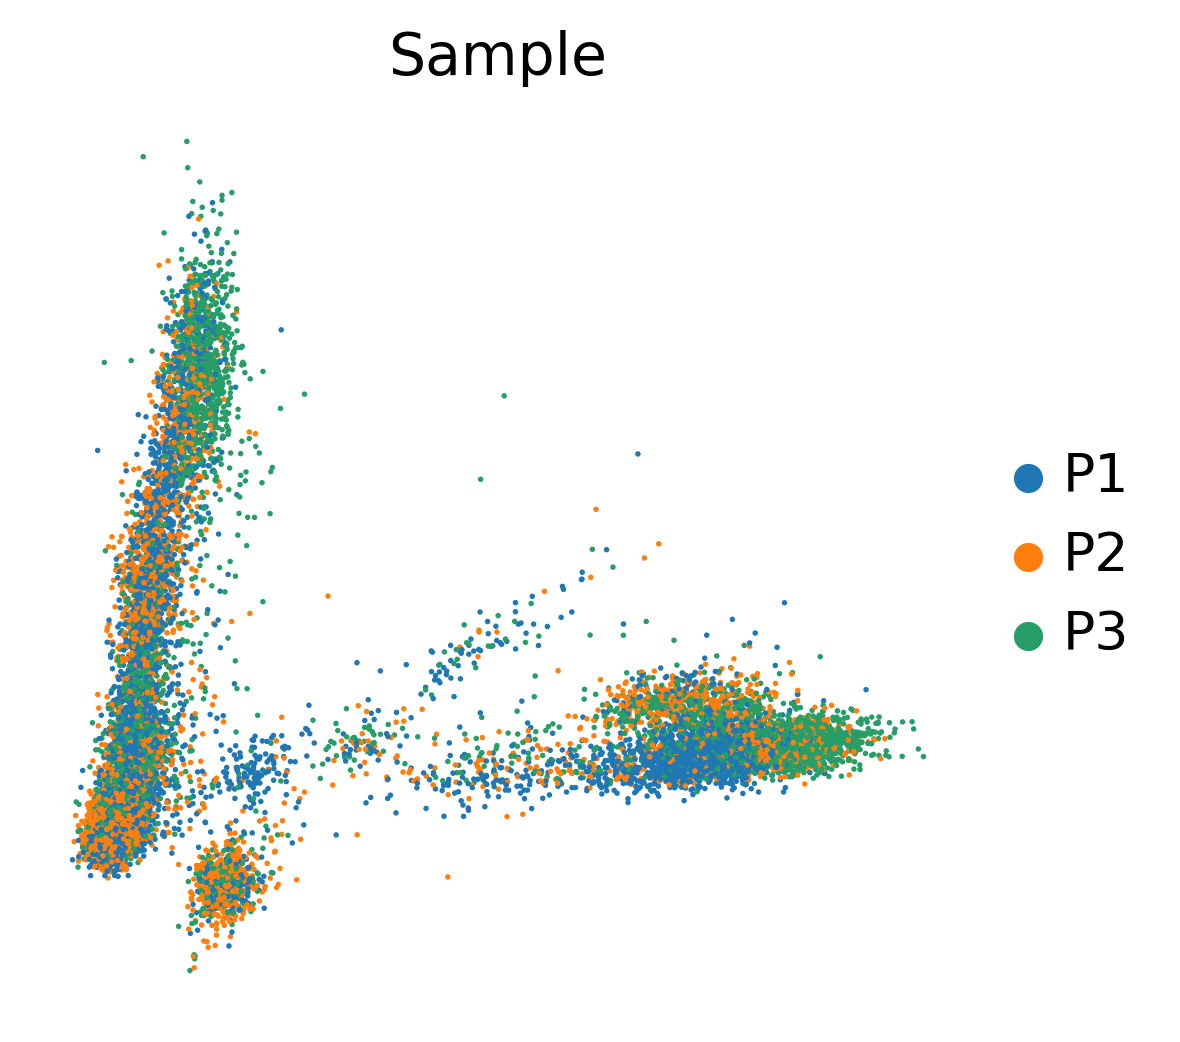

In [ ]:
sc.pl.pca(adata, color="donor", frameon=False, title="Sample")

In [ ]:
my_pca_embeddings = adata.obsm["X_pca"].copy()
meta_data = adata.obs.copy()

## Harmony

### Harmony R

In [ ]:
%%R -i my_pca_embeddings -i meta_data
library(harmony)
harmony_object <- HarmonyMatrix(
  my_pca_embeddings,
  meta_data,
  "donor",
  do_pca = FALSE,
  max.iter.harmony = 20,
  return_object = TRUE
)

In [ ]:
%%R -o X_pca_harmony_R
X_pca_harmony_R <- harmony_object$Z_corr

### Harmonypy

In [ ]:
import harmonypy
ho = harmonypy.run_harmony(
    my_pca_embeddings, 
    meta_data,
    "donor",
    max_iter_harmony=20,
)

2023-01-03 10:29:02,079 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2023-01-03 10:29:14,560 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2023-01-03 10:29:14,787 - harmonypy - INFO - Iteration 1 of 20
INFO:harmonypy:Iteration 1 of 20
2023-01-03 10:29:21,264 - harmonypy - INFO - Iteration 2 of 20
INFO:harmonypy:Iteration 2 of 20
2023-01-03 10:29:27,906 - harmonypy - INFO - Iteration 3 of 20
INFO:harmonypy:Iteration 3 of 20
2023-01-03 10:29:34,478 - harmonypy - INFO - Iteration 4 of 20
INFO:harmonypy:Iteration 4 of 20
2023-01-03 10:29:38,507 - harmonypy - INFO - Iteration 5 of 20
INFO:harmonypy:Iteration 5 of 20
2023-01-03 10:29:44,919 - harmonypy - INFO - Iteration 6 of 20
INFO:harmonypy:Iteration 6 of 20
2023-01-03 10:29:51,532 - harmonypy - INFO - Iteration 7 of 20
INFO:harmonypy:Iteration 7 of 20
2023-01-03 10:29:54,927 - 

### Harmony R vs Harmonypy

In [ ]:
adata.obsm["X_pca_harmony_R"] = X_pca_harmony_R.copy().T
adata.obsm["X_pca_harmony_Python"] = ho.Z_corr.copy().T

In [ ]:
# Compute neighbors
sc.pp.neighbors(adata, use_rep="X_pca_harmony_R", key_added="Harmony_R", n_neighbors=21)
sc.pp.neighbors(adata, use_rep="X_pca_harmony_Python", key_added="Harmony_Python", n_neighbors=21)

In [ ]:
# Compare number of same neighbors for each cell
def compare_neighbors(adata, obsp1, obsp2):
  n_same = []
  
  for i in range(len(adata)):
    neighbors_R = set(list(adata.obs_names[(adata.obsp[obsp1][i] > 0).A[0]]))
    neighbors_Python = set(list(adata.obs_names[(adata.obsp[obsp2][i] > 0).A[0]]))
    n_same.append(len(neighbors_R.intersection(neighbors_Python)))
  
  adata.obs["n_same_cells"] = n_same
  
  return n_same

In [ ]:
n_same = compare_neighbors(adata, "Harmony_R_distances", "Harmony_Python_distances")

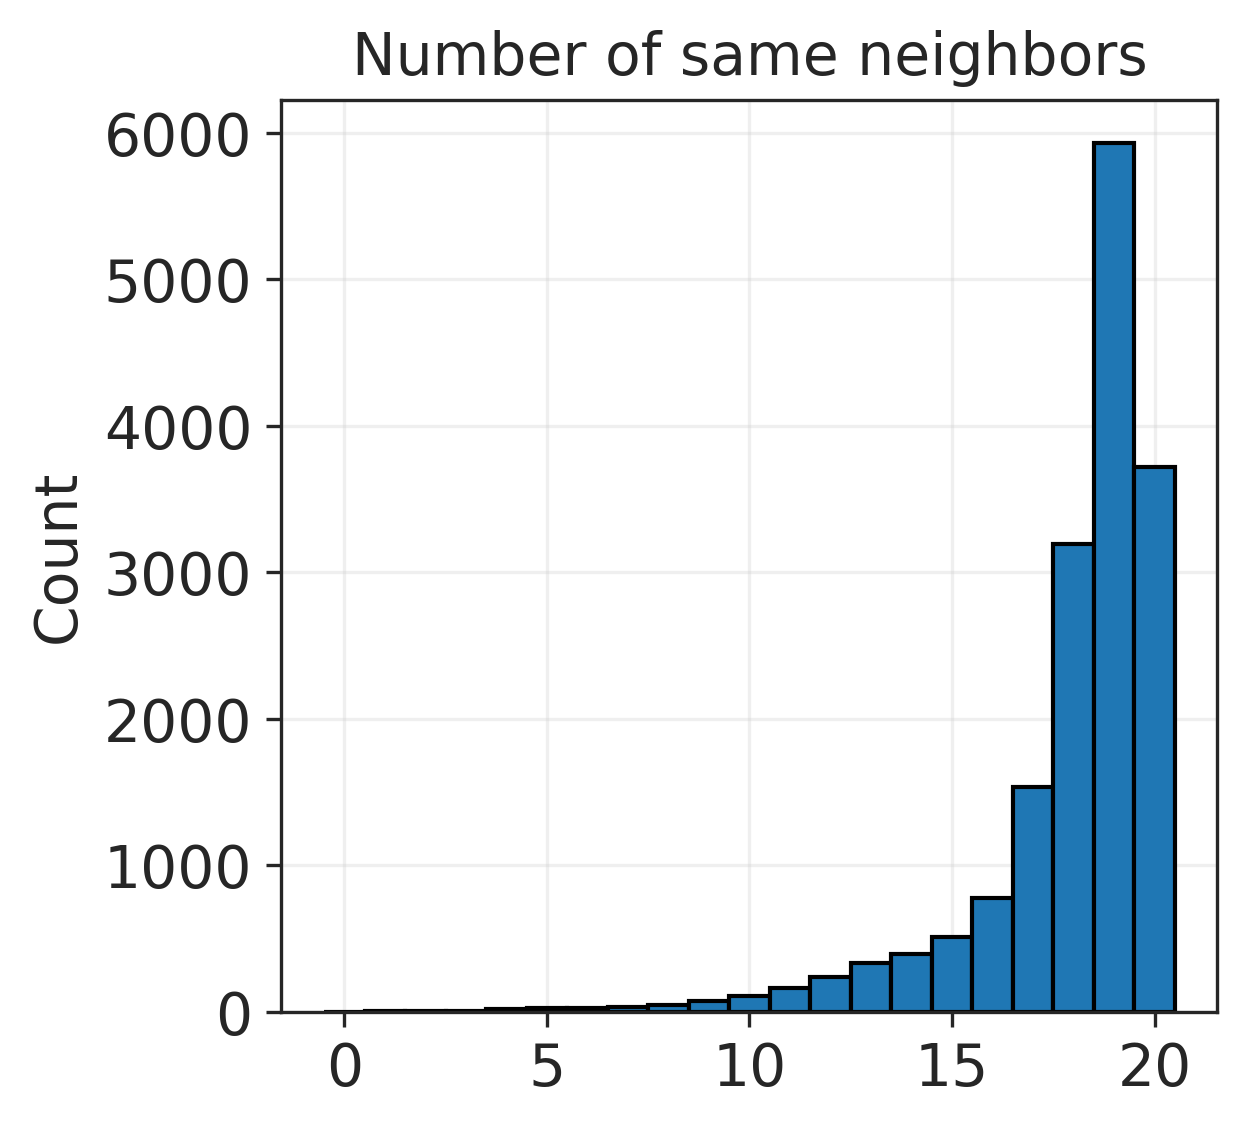

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(4, 4))
sns.histplot(n_same, ax=ax, discrete=True, linewidth=1, edgecolor="black", alpha=1)
ax.set_title("Number of same neighbors")
ax.grid(alpha=0.3)

## Symphony

In [ ]:
import symphonypy as sp

adata_reference = adata.copy()

adata_query = sc.datasets.pbmc3k()
adata_query.var_names_make_unique()

sc.pp.normalize_total(adata_query)
sc.pp.log1p(adata_query)

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

In [ ]:
# import importlib
# importlib.reload(sp)
# importlib.reload(sp.pp)
# importlib.reload(sp.tl)
# importlib.reload(sp._utils)

### Harmony R -> Symphonypy

In [ ]:
%%R -o R,Y,K,sigma
R <- harmony_object$R
Y <- harmony_object$Y
K <- harmony_object$K
sigma <- harmony_object$sigma

Take all the Harmony parameters from R Harmony object to be able to compare Symphony R with Symphonypy independently from difference between Harmony R and Harmonypy

In [ ]:
adata_reference.uns["harmony"] = {
    # [K] the number of cells softly belonging to each cluster
    "Nr": R.sum(axis=1),
    # [K, d] = [K, Nref] x [d, N_ref].T
    "C": np.dot(R, X_pca_harmony_R.T),
    # ref cluster centroids L2 normalized
    # [K, d] = [d, K].T
    "Y": Y.T,
    # number of clusters
    "K": K[0],
    # sigma [K] (cluster cross enthropy regularization coef)
    "sigma": sigma.squeeze(1),
    "ref_basis_loadings": "PCs",
    "ref_basis_adjusted": "X_pca_harmony",
}

adata_reference.obsm["X_pca_harmony_R_py"] = adata_reference.obsm["X_pca_harmony_R"].copy() 

In [ ]:
adata_query.obs["donor"] = 1

In [ ]:
sp.tl.map_embedding(
    adata_reference,
    adata_query,
    key="donor",
    adjusted_basis_query = "X_pca_harmony_R_py",
    query_basis_ref= "X_pca_reference"
)

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


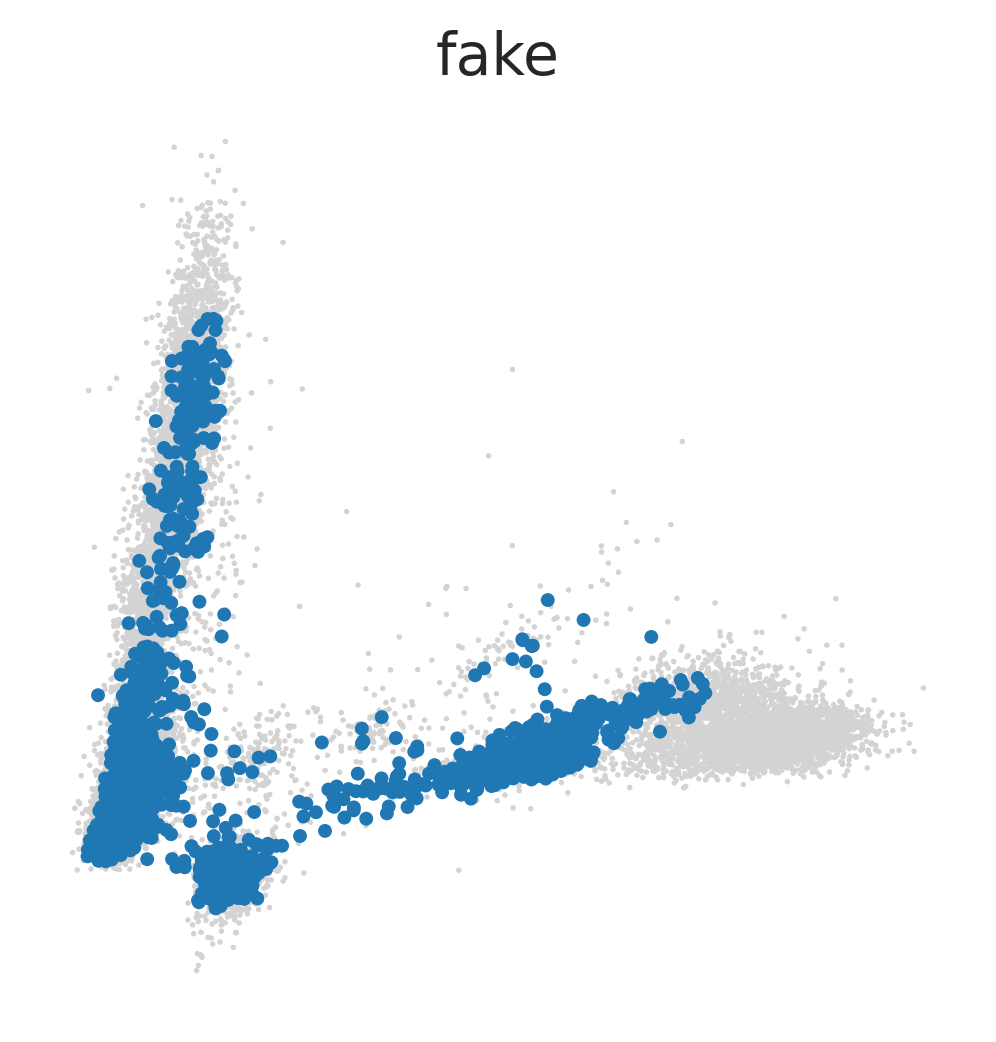

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
adata_query.obs["fake"] = "True"
sc.pl.embedding(adata_reference, basis="X_pca_harmony_R_py", ax=ax, show=False, frameon=False)
sc.pl.embedding(adata_query, basis="X_pca_harmony_R_py", ax=ax, show=False, color="fake",
                legend_loc=None, frameon=False)
del adata_query.obs["fake"]

In [ ]:
labels = ['celltype.l1', 'celltype.l2', 'celltype.l3']
n_neighbours = 20
basis_adjusted = "X_pca_harmony_R_py"

In [ ]:
sp.tl.transfer_labels_kNN(
    adata_reference,
    adata_query,
    labels,
    labels,
    # kNN args
    n_neighbours,
    ref_basis=basis_adjusted,
    query_basis=basis_adjusted,
    # kNN kwargs
    weights="distance",
)

sc.pp.neighbors(
    adata_reference, n_pcs=n_comps, n_neighbors=n_neighbours, knn=True, use_rep=basis_adjusted
)
sc.tl.umap(adata_reference)

In [ ]:
# the problem is that sc.tl.ingest makes unnecessary check
# that all var_names in adata_query and adata_ref are the same :(
# there are issues on scanpy github concerning this problem
common_genes = list(set(adata_query.var_names).intersection(adata_reference.var_names))

adata_query_t = adata_query[:,common_genes].copy()

sc.tl.ingest(adata=adata_query_t, adata_ref=adata_reference[:,common_genes], embedding_method="umap")
adata_query_t

AnnData object with n_obs × n_vars = 2700 × 15391
    obs: 'donor', 'celltype.l1', 'celltype.l2', 'celltype.l3'
    var: 'gene_ids'
    uns: 'log1p', 'fake_colors'
    obsm: 'X_pca_reference', 'X_pca_harmony_R_py', 'rep', 'X_umap'

In [ ]:
adata_query.obsm["X_umap"] = adata_query_t.obsm["X_umap"]

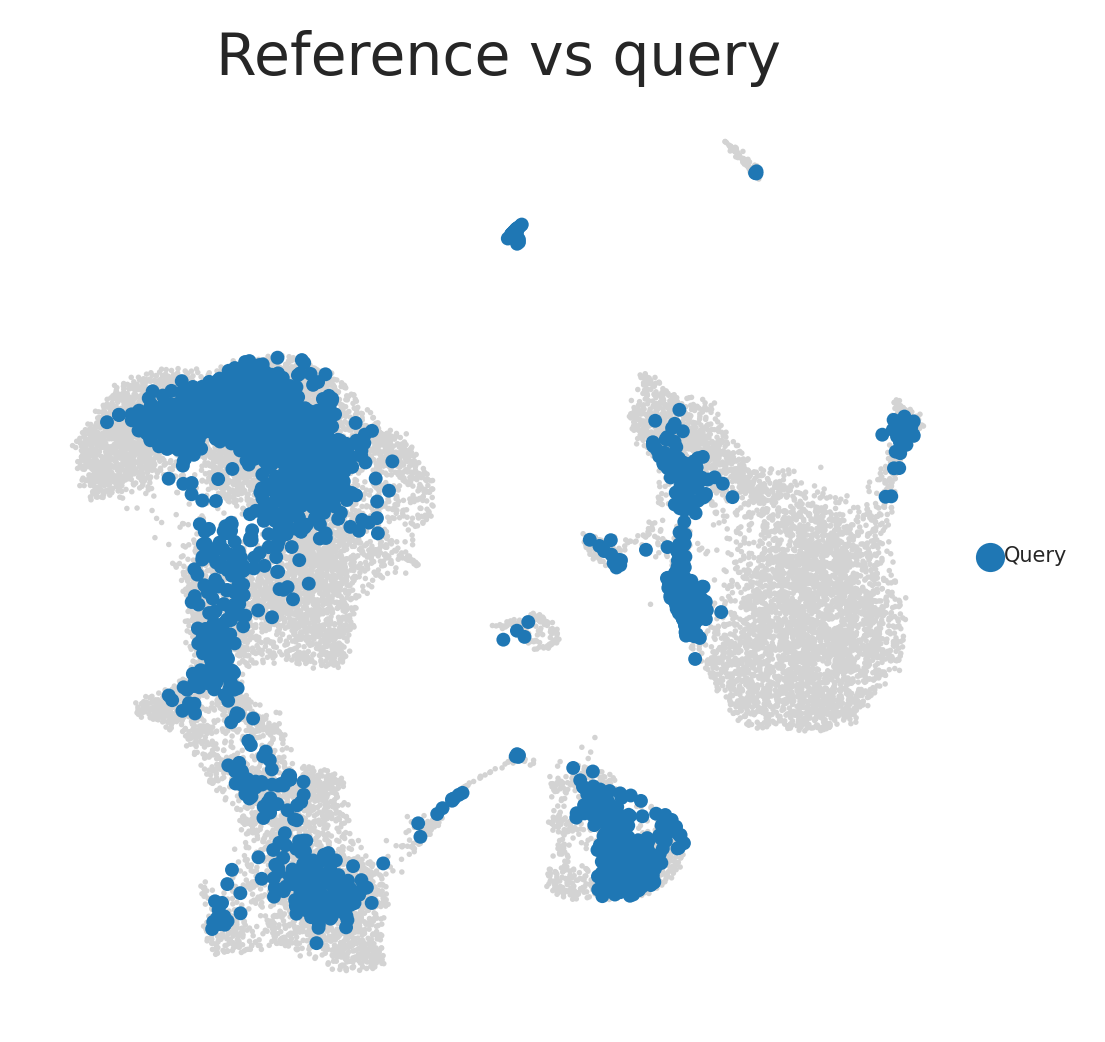

In [ ]:
fig, ax = plt.subplots()
adata_query.obs["Reference vs query"] = "Query"
sc.pl.embedding(adata_reference, basis="X_umap", ax=ax, show=False, frameon=False)
sc.pl.embedding(adata_query, basis="X_umap", ax=ax, show=False, color="Reference vs query", frameon=False)
del adata_query.obs["Reference vs query"]

In [ ]:
plt.rcParams.update({'legend.fontsize': 5})

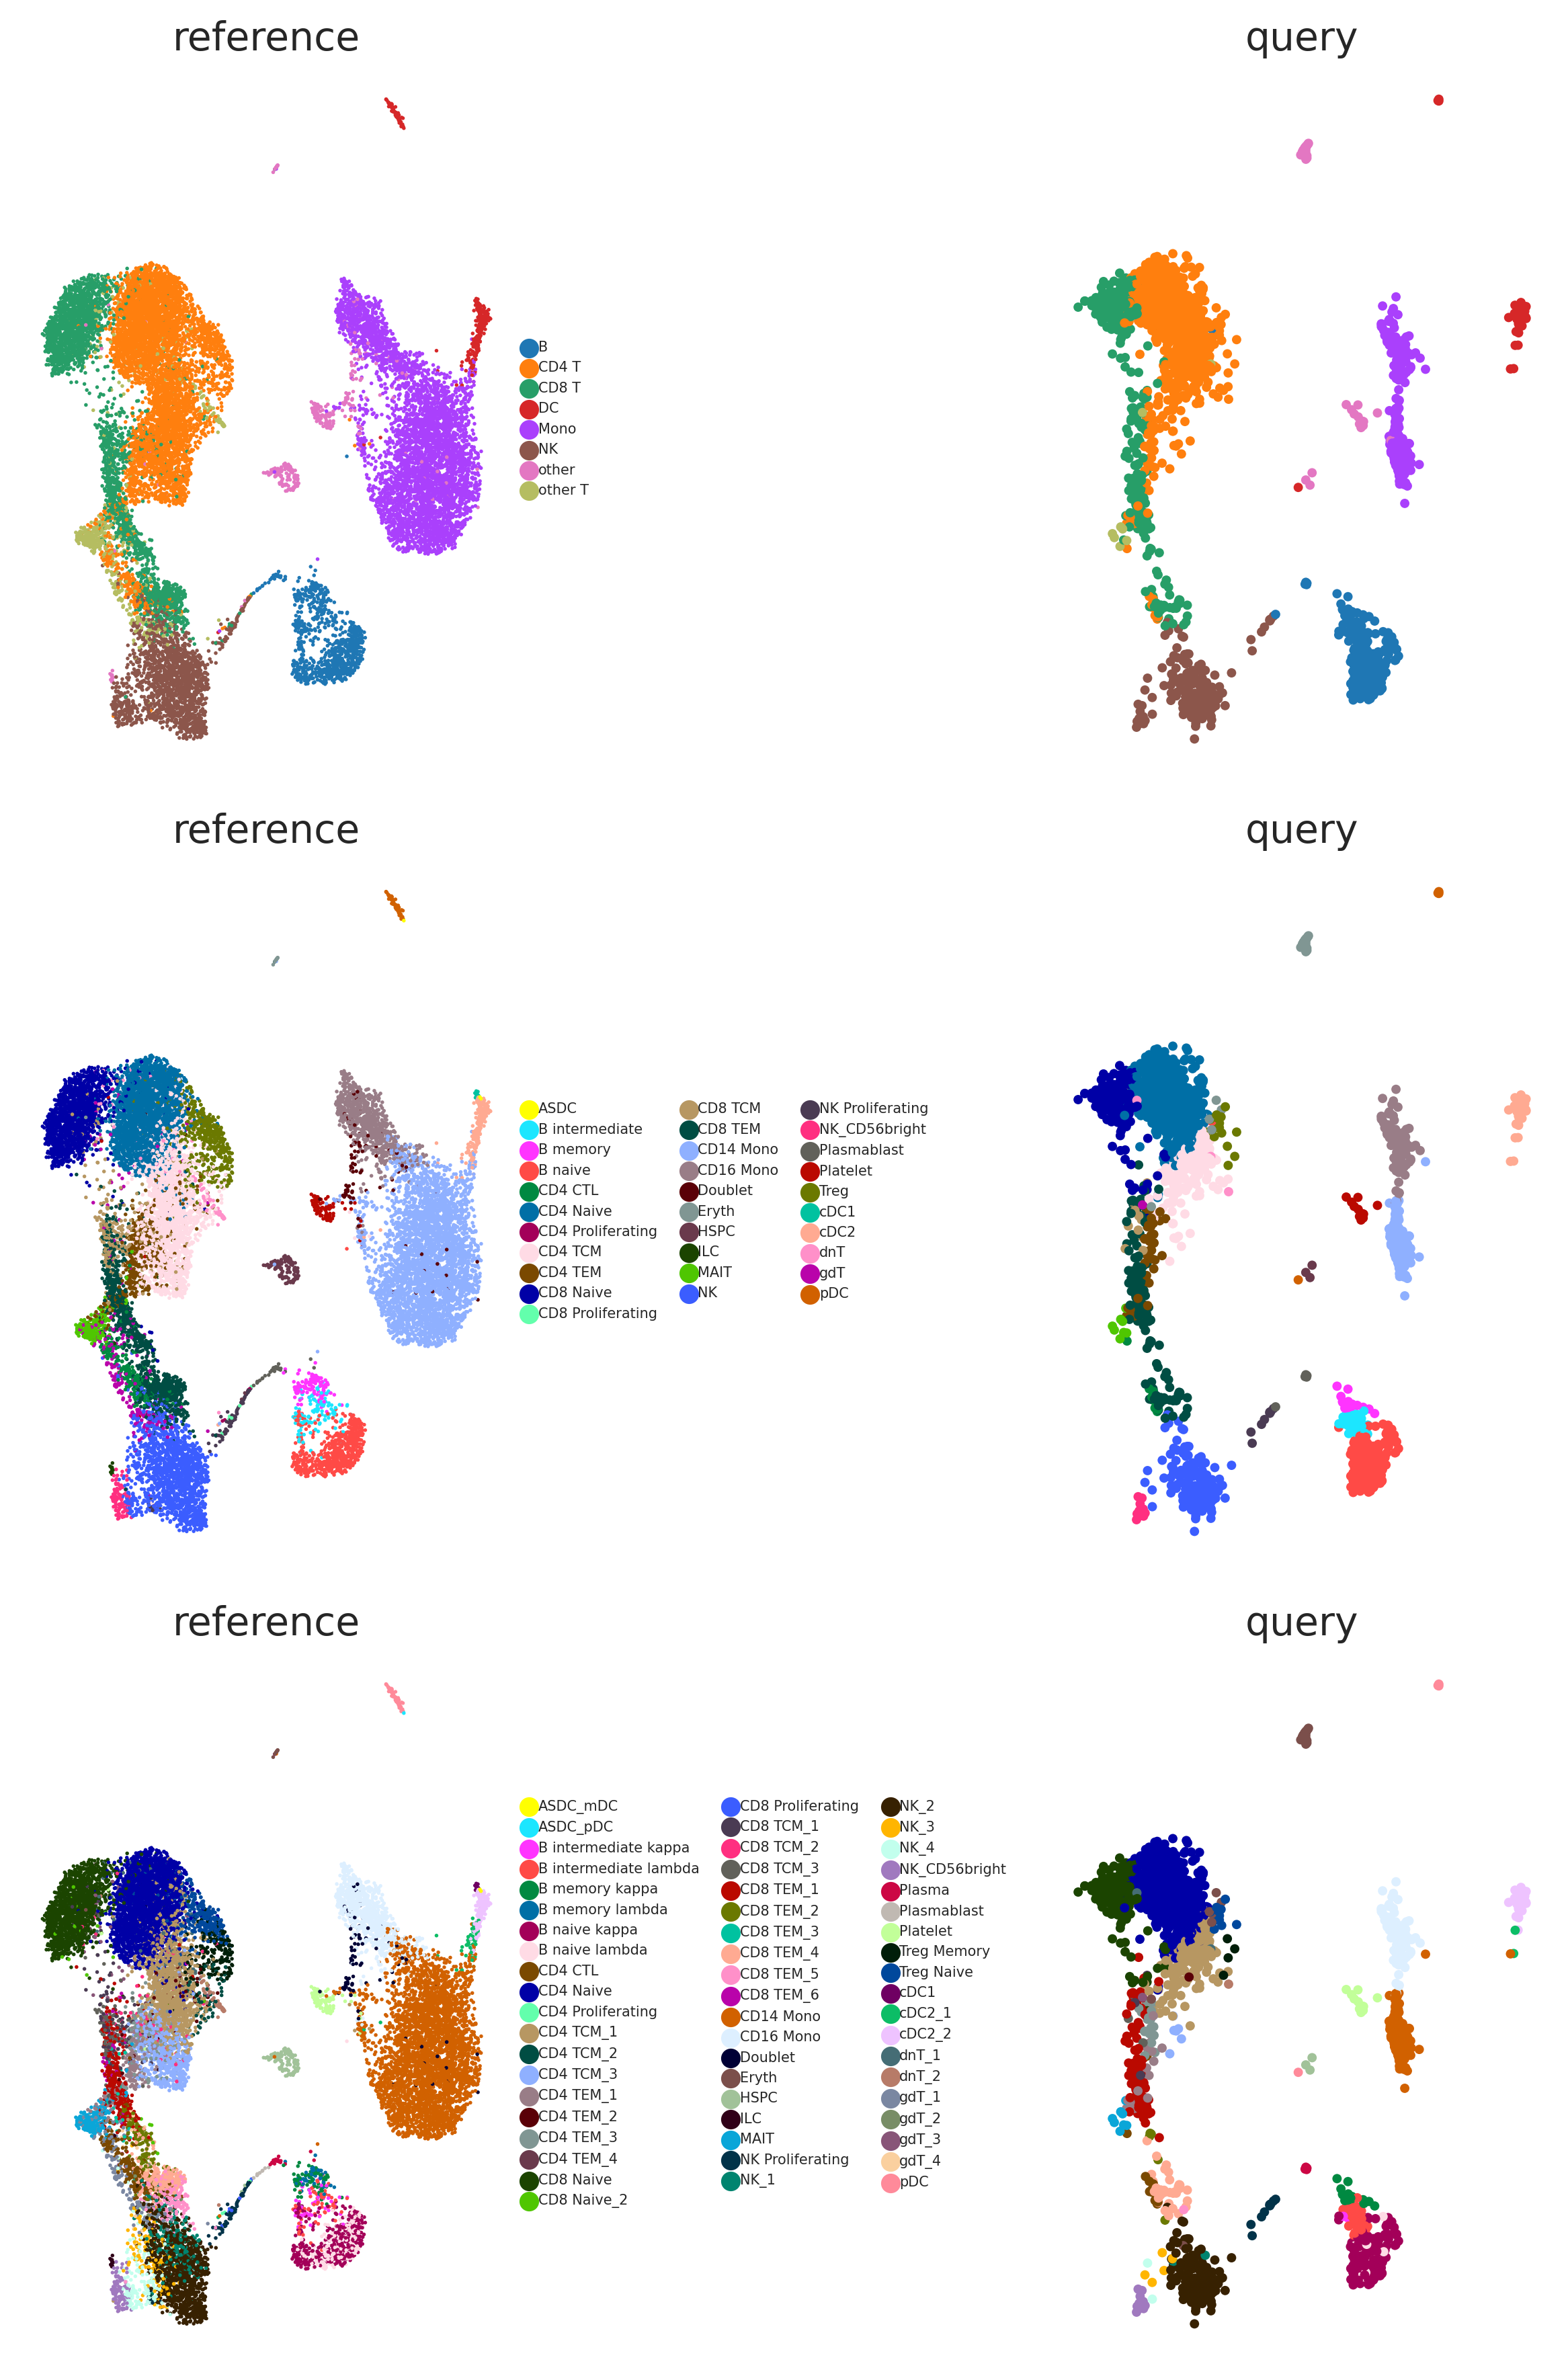

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(8, 3*4))

sc.pl.embedding(adata_reference, basis="X_umap", ax=axs[0][0], show=False, frameon=False, color="celltype.l1", title="reference")
ref_l1 = adata_reference.obs["celltype.l1"].unique().sort_values()
adata_query.uns['celltype.l1_colors'] = np.array(adata_reference.uns["celltype.l1_colors"])[ref_l1.isin(adata_query.obs["celltype.l1"].unique().sort_values())]
sc.pl.embedding(adata_query, basis="X_umap", ax=axs[0][1], show=False, color="celltype.l1", frameon=False, title="query", legend_loc=None)

sc.pl.embedding(adata_reference, basis="X_umap", ax=axs[1][0], show=False, frameon=False, color="celltype.l2", title="reference")
ref_l2 = adata_reference.obs["celltype.l2"].unique().sort_values()
adata_query.uns['celltype.l2_colors'] = np.array(adata_reference.uns["celltype.l2_colors"])[ref_l2.isin(adata_query.obs["celltype.l2"].unique().sort_values())]
sc.pl.embedding(adata_query, basis="X_umap", ax=axs[1][1], show=False, color="celltype.l2", frameon=False, title="query", legend_loc=None)

sc.pl.embedding(adata_reference, basis="X_umap", ax=axs[2][0], show=False, frameon=False, color="celltype.l3", title="reference")
ref_l3 = adata_reference.obs["celltype.l3"].unique().sort_values()
adata_query.uns['celltype.l3_colors'] = np.array(adata_reference.uns["celltype.l3_colors"])[ref_l3.isin(adata_query.obs["celltype.l3"].unique().sort_values())]
sc.pl.embedding(adata_query, basis="X_umap", ax=axs[2][1], show=False, color="celltype.l3", frameon=False, title="query", legend_loc=None)

fig.tight_layout()

In [ ]:
adata_query.obs["celltype.l1"].value_counts().sort_index()

B           346
CD4 T      1111
CD8 T       350
DC           35
Mono        616
NK          166
other        65
other T      11
Name: celltype.l1, dtype: int64

### Harmony R -> Symphony R

In [ ]:
var_genes = adata_reference.var_names[adata_reference.var.highly_variable]
gene_means = adata_reference.var.loc[var_genes, "mean"]
gene_sds = adata_reference.var.loc[var_genes, "std"]
loadings = adata_reference.varm["PCs"][adata_reference.var.highly_variable]

In [ ]:
%%R -i var_genes,gene_means,gene_sds

vargenes_means_sds <- data.frame(symbol = var_genes, mean = gene_means, stddev=gene_sds)

In [ ]:
%%R -i loadings
# Compress a Harmony object into a Symphony reference
reference = symphony::buildReferenceFromHarmonyObj(
                           harmony_object,            # output object from HarmonyMatrix()
                           meta_data,           # reference cell metadata
                           vargenes_means_sds,     # gene names, means, and std devs for scaling
                           loadings,               # genes x PCs matrix
                           )

In [ ]:
query_exp = adata_query.X.A.T
query_metadata = adata_query.obs
gene_names = adata_query.var_names

In [ ]:
%%R -i query_exp,query_metadata,gene_names
rownames(query_exp) <- gene_names

In [ ]:
%%R
# Map query
query = symphony::mapQuery(query_exp,             # query gene expression (genes x cells)
                 query_metadata,        # query metadata (cells x attributes)
                 reference,             # Symphony reference object
                 do_normalize = FALSE,  # perform log(CP10k+1) normalization on query
                 do_umap = FALSE,
                 )

In [ ]:
%%R -o X_pca_harmony_R_R
# names(query)
X_pca_harmony_R_R <- query$Z

### Symphony R vs Symphonypy

In [ ]:
adata_query.obsm["X_pca_harmony_R_R"] = X_pca_harmony_R_R.T

<AxesSubplot: title={'center': 'Symphony R vs Python'}, xlabel='X_pca_harmony_R_R1', ylabel='X_pca_harmony_R_R2'>

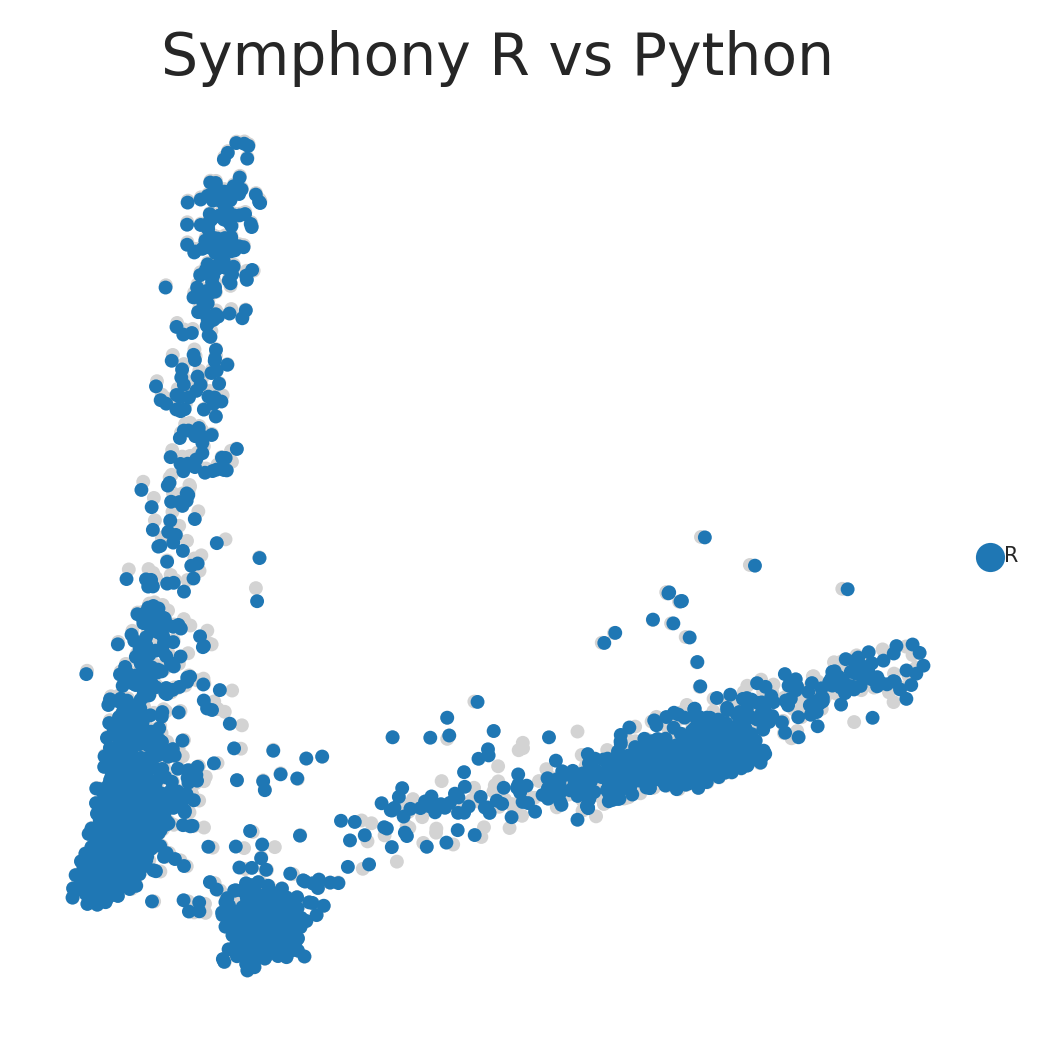

In [ ]:
fig, ax = plt.subplots()
adata_query.obs["Symphony R vs Python"] = "R"
sc.pl.embedding(adata_query, basis="X_pca_harmony_R_py", ax=ax, show=False, frameon=False)
sc.pl.embedding(adata_query, basis="X_pca_harmony_R_R", ax=ax, show=False, frameon=False, color="Symphony R vs Python")

In [ ]:
# Compute neighbors
sc.pp.neighbors(adata_query, use_rep="X_pca_harmony_R_py", key_added="Harmony_R_py", n_neighbors=21)
sc.pp.neighbors(adata_query, use_rep="X_pca_harmony_R_R", key_added="Harmony_R_R", n_neighbors=21)

In [ ]:
# Compare number of same neighbors for each cell
n_same = compare_neighbors(adata_query, "Harmony_R_py_distances", "Harmony_R_R_distances")

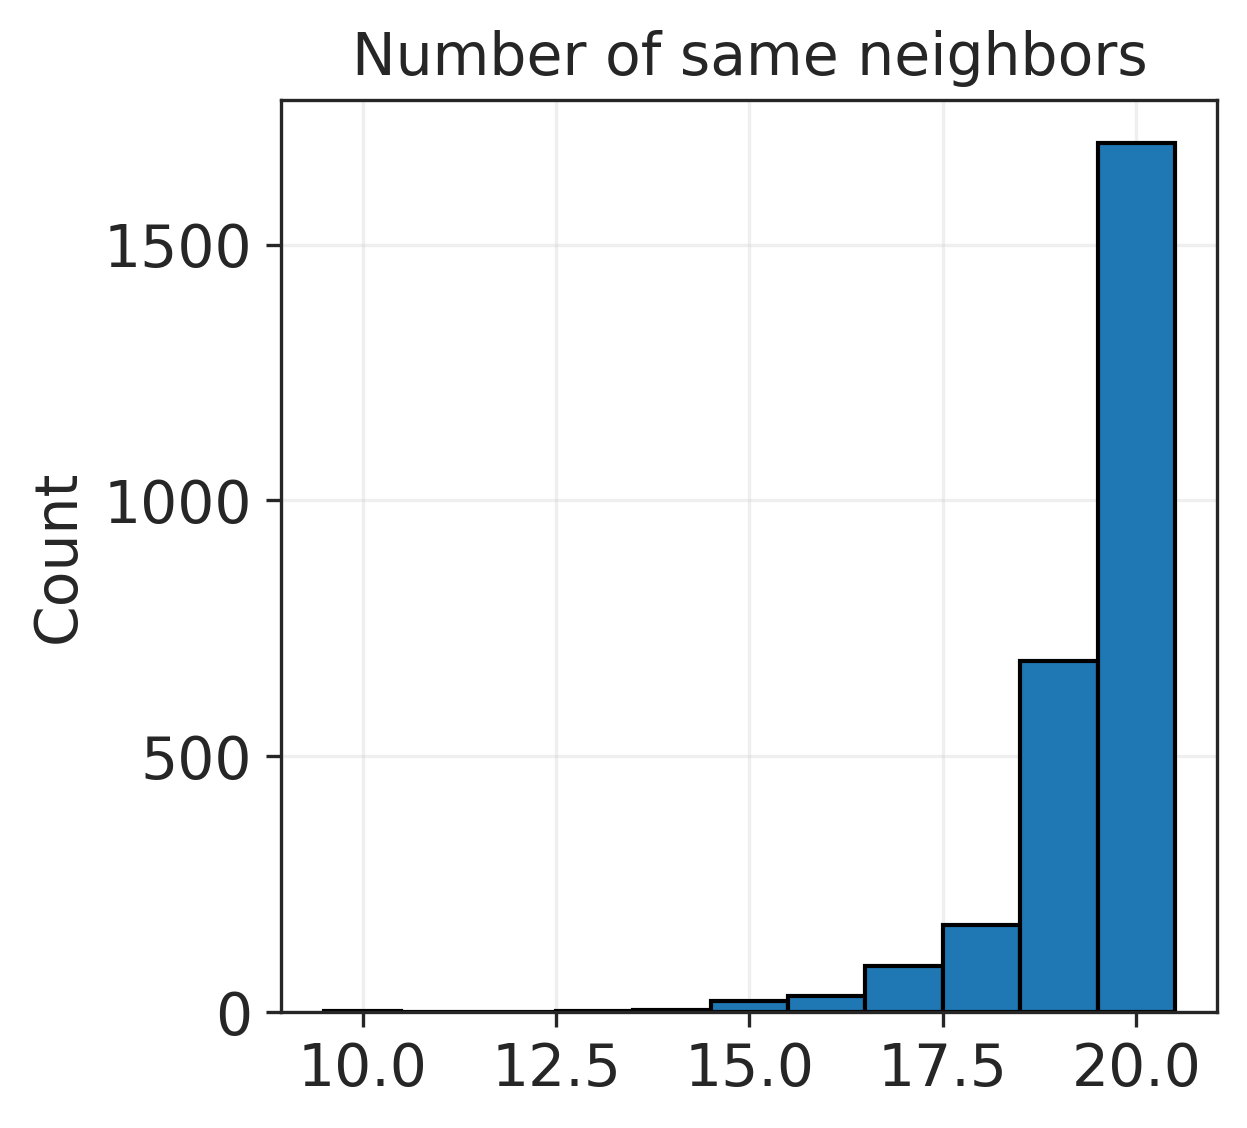

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.histplot(n_same, ax=ax, discrete=True, linewidth=1, edgecolor="black", alpha=1)
ax.set_title("Number of same neighbors")
ax.grid(alpha=0.3)